In [ ]:
import json
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

#with open('/content/drive/My Drive/Colab Notebooks/Fraud/transactions.json', encoding='utf-8-sig') as f_input:
 # df = pd.read_json(f_input, lines=True)

#df.to_csv('/content/drive/My Drive/Colab Notebooks/Fraud/transactions.csv', encoding='utf-8', index=False)

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fraud/transactions.csv',sep=',')
pd.set_option('display.max_columns',None)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,5.0,1.0,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,9.0,1.0,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,5.0,1.0,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,2.0,1.0,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,2.0,1.0,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             641914 non-null  int64  
 1   customerId                641914 non-null  int64  
 2   creditLimit               641914 non-null  int64  
 3   availableMoney            641914 non-null  float64
 4   transactionDateTime       641914 non-null  object 
 5   transactionAmount         641914 non-null  float64
 6   merchantName              641914 non-null  object 
 7   acqCountry                638001 non-null  object 
 8   merchantCountryCode       641290 non-null  object 
 9   posEntryMode              638569 non-null  float64
 10  posConditionCode          641627 non-null  float64
 11  merchantCategoryCode      641914 non-null  object 
 12  currentExpDate            641914 non-null  object 
 13  accountOpenDate           641914 non-null  o

In [ ]:
df.nunique()

accountNumber                 5000
customerId                    5000
creditLimit                     10
availableMoney              450648
transactionDateTime         635472
transactionAmount            62735
merchantName                  2493
acqCountry                       4
merchantCountryCode              4
posEntryMode                     5
posConditionCode                 3
merchantCategoryCode            19
currentExpDate                 165
accountOpenDate               1826
dateOfLastAddressChange       2186
cardCVV                        899
enteredCVV                     980
cardLast4Digits               5134
transactionType                  3
isFraud                          2
echoBuffer                       0
currentBalance              406990
merchantCity                     0
merchantState                    0
merchantZip                      0
cardPresent                      2
posOnPremises                    0
recurringAuthInd                 0
expirationDateKeyInM

In [ ]:
df['transactionDateTime']=pd.to_datetime(df['transactionDateTime'])
df['currentExpDate']=pd.to_datetime(df['currentExpDate'])
df['accountOpenDate']=pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange']=pd.to_datetime(df['dateOfLastAddressChange'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641914 entries, 0 to 641913
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   accountNumber             641914 non-null  int64         
 1   customerId                641914 non-null  int64         
 2   creditLimit               641914 non-null  int64         
 3   availableMoney            641914 non-null  float64       
 4   transactionDateTime       641914 non-null  datetime64[ns]
 5   transactionAmount         641914 non-null  float64       
 6   merchantName              641914 non-null  object        
 7   acqCountry                638001 non-null  object        
 8   merchantCountryCode       641290 non-null  object        
 9   posEntryMode              638569 non-null  float64       
 10  posConditionCode          641627 non-null  float64       
 11  merchantCategoryCode      641914 non-null  object        
 12  cu

In [ ]:
df['transactionDateTime_year'] = df['transactionDateTime'].dt.year
df['transactionDateTime_month'] = df['transactionDateTime'].dt.month
df['transactionDateTime_day'] = df['transactionDateTime'].dt.day
df['DateTransaction'] = pd.to_datetime(df['transactionDateTime']).dt.normalize()

df['currentExpDate_year'] = df['currentExpDate'].dt.year
df['currentExpDate_month'] = df['currentExpDate'].dt.month
df['currentExpDate_day'] = df['currentExpDate'].dt.day
df['DatecurrentExp'] = pd.to_datetime(df['currentExpDate']).dt.normalize()

df['accountOpenDate_year'] = df['accountOpenDate'].dt.year
df['accountOpenDate_month'] = df['accountOpenDate'].dt.month
df['accountOpenDate_day'] = df['accountOpenDate'].dt.day
df['DateAccountOpen'] = pd.to_datetime(df['accountOpenDate']).dt.normalize()

df['dateOfLastAddressChange_year'] = df['dateOfLastAddressChange'].dt.year
df['dateOfLastAddressChange_month'] = df['dateOfLastAddressChange'].dt.month
df['dateOfLastAddressChange_day'] = df['dateOfLastAddressChange'].dt.day
df['DateLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange']).dt.normalize()

# drop datetime column
df.drop('transactionDateTime',axis = 1,inplace = True)
df.drop('currentExpDate',axis = 1,inplace = True)
df.drop('accountOpenDate',axis = 1,inplace = True)
df.drop('dateOfLastAddressChange',axis = 1,inplace = True)

In [ ]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,DateTransaction,currentExpDate_year,currentExpDate_month,currentExpDate_day,DatecurrentExp,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,DateAccountOpen,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,DateLastAddressChange
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,US,5.0,1.0,rideshare,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,2016,1,8,2016-01-08,2020,4,1,2020-04-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
1,733493772,733493772,5000,4888.67,24.75,Uber,US,US,9.0,1.0,rideshare,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False,2016,1,9,2016-01-09,2023,6,1,2023-06-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,US,5.0,1.0,rideshare,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False,2016,1,11,2016-01-11,2027,12,1,2027-12-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,US,2.0,1.0,rideshare,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False,2016,1,11,2016-01-11,2029,9,1,2029-09-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,US,2.0,1.0,rideshare,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False,2016,1,16,2016-01-16,2024,10,1,2024-10-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03


In [ ]:
df.dtypes

accountNumber                             int64
customerId                                int64
creditLimit                               int64
availableMoney                          float64
transactionAmount                       float64
merchantName                             object
acqCountry                               object
merchantCountryCode                      object
posEntryMode                            float64
posConditionCode                        float64
merchantCategoryCode                     object
cardCVV                                   int64
enteredCVV                                int64
cardLast4Digits                           int64
transactionType                          object
isFraud                                    bool
echoBuffer                              float64
currentBalance                          float64
merchantCity                            float64
merchantState                           float64
merchantZip                             

In [ ]:
import numpy as np
np.sum(df.isnull())

accountNumber                         0
customerId                            0
creditLimit                           0
availableMoney                        0
transactionAmount                     0
merchantName                          0
acqCountry                         3913
merchantCountryCode                 624
posEntryMode                       3345
posConditionCode                    287
merchantCategoryCode                  0
cardCVV                               0
enteredCVV                            0
cardLast4Digits                       0
transactionType                     589
isFraud                               0
echoBuffer                       641914
currentBalance                        0
merchantCity                     641914
merchantState                    641914
merchantZip                      641914
cardPresent                           0
posOnPremises                    641914
recurringAuthInd                 641914
expirationDateKeyInMatch              0


In [ ]:
#persentase missing value
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_data = pd.DataFrame({'percent_missing': percent_missing})
missing_value_data.sort_values('percent_missing', inplace=True)
print(missing_value_data)

                               percent_missing
accountNumber                         0.000000
expirationDateKeyInMatch              0.000000
transactionDateTime_year              0.000000
transactionDateTime_month             0.000000
transactionDateTime_day               0.000000
DateTransaction                       0.000000
currentExpDate_year                   0.000000
currentExpDate_month                  0.000000
currentExpDate_day                    0.000000
DatecurrentExp                        0.000000
accountOpenDate_year                  0.000000
accountOpenDate_month                 0.000000
accountOpenDate_day                   0.000000
DateAccountOpen                       0.000000
dateOfLastAddressChange_year          0.000000
dateOfLastAddressChange_month         0.000000
cardPresent                           0.000000
dateOfLastAddressChange_day           0.000000
DateLastAddressChange                 0.000000
merchantCategoryCode                  0.000000
currentBalanc

In [ ]:
#hapuskolom yang missing value > 50%
data=df.drop(["merchantCity","recurringAuthInd","merchantState","merchantZip","posOnPremises","echoBuffer","acqCountry","posEntryMode"],axis=1)
data

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,merchantCountryCode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,DateTransaction,currentExpDate_year,currentExpDate_month,currentExpDate_day,DatecurrentExp,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,DateAccountOpen,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,DateLastAddressChange
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,0.00,False,False,2016,1,8,2016-01-08,2020,4,1,2020-04-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
1,733493772,733493772,5000,4888.67,24.75,Uber,US,1.0,rideshare,492,492,9184,PURCHASE,False,111.33,False,False,2016,1,9,2016-01-09,2023,6,1,2023-06-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,False,136.08,False,False,2016,1,11,2016-01-11,2027,12,1,2027-12-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,323.48,False,False,2016,1,11,2016-01-11,2029,9,1,2029-09-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,1.0,rideshare,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,2016,1,16,2016-01-16,2024,10,1,2024-10-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641909,186770399,186770399,7500,2574.02,5.37,Apple iTunes,US,8.0,mobileapps,127,127,5432,PURCHASE,False,4925.98,False,False,2016,12,4,2016-12-04,2030,1,1,2030-01-01,2015,11,4,2015-11-04,2016,6,3,2016-06-03
641910,186770399,186770399,7500,2568.65,223.70,Blue Mountain eCards,US,1.0,online_gifts,127,127,5432,PURCHASE,False,4931.35,False,False,2016,12,9,2016-12-09,2026,5,1,2026-05-01,2015,11,4,2015-11-04,2016,6,3,2016-06-03
641911,186770399,186770399,7500,2344.95,138.42,Fresh Flowers,US,1.0,online_gifts,127,127,5432,PURCHASE,False,5155.05,False,False,2016,12,16,2016-12-16,2019,10,1,2019-10-01,2015,11,4,2015-11-04,2016,6,3,2016-06-03
641912,186770399,186770399,7500,2206.53,16.31,abc.com,US,8.0,online_subscriptions,127,127,5432,PURCHASE,False,5293.47,False,False,2016,12,19,2016-12-19,2029,11,1,2029-11-01,2015,11,4,2015-11-04,2016,6,3,2016-06-03


In [ ]:
print(data.replace(r'^\s*$', np.nan, regex=True)) #ganti data (spasi)dengan NaN agar terbaca sbg missing value

        accountNumber  customerId  creditLimit  availableMoney  \
0           733493772   733493772         5000         5000.00   
1           733493772   733493772         5000         4888.67   
2           733493772   733493772         5000         4863.92   
3           733493772   733493772         5000         4676.52   
4           733493772   733493772         5000         4449.18   
...               ...         ...          ...             ...   
641909      186770399   186770399         7500         2574.02   
641910      186770399   186770399         7500         2568.65   
641911      186770399   186770399         7500         2344.95   
641912      186770399   186770399         7500         2206.53   
641913      186770399   186770399         7500         2190.22   

        transactionAmount              merchantName merchantCountryCode  \
0                  111.33                      Lyft                  US   
1                   24.75                      Uber      

In [ ]:
import statistics
modus = statistics.mode(data['posConditionCode'])
modus
#jadi posConditionCode yang nan diisi 1

1.0

In [ ]:
modus = statistics.mode(data['transactionType'])
modus

'PURCHASE'

In [ ]:
modus = statistics.mode(data['merchantCountryCode'])
modus

'US'

In [ ]:
np.sum(data.isnull()) #cek lagi missing value hasil replace

accountNumber                      0
customerId                         0
creditLimit                        0
availableMoney                     0
transactionAmount                  0
merchantName                       0
merchantCountryCode              624
posConditionCode                 287
merchantCategoryCode               0
cardCVV                            0
enteredCVV                         0
cardLast4Digits                    0
transactionType                  589
isFraud                            0
currentBalance                     0
cardPresent                        0
expirationDateKeyInMatch           0
transactionDateTime_year           0
transactionDateTime_month          0
transactionDateTime_day            0
DateTransaction                    0
currentExpDate_year                0
currentExpDate_month               0
currentExpDate_day                 0
DatecurrentExp                     0
accountOpenDate_year               0
accountOpenDate_month              0
a

In [ ]:
from scipy.stats import mode #mengganti nilai missing value <50% tadi dengan nilai modus
modus = statistics.mode(data['posConditionCode'])
data['posConditionCode']=data['posConditionCode'].fillna(data['posConditionCode'].replace(np.nan, 1))
data['transactionType']=data['transactionType'].fillna(value=data['transactionType'].replace(np.nan, 'PURCHASE'))
data['merchantCountryCode']=data['merchantCountryCode'].fillna(value=data['merchantCountryCode'].replace(np.nan, 'US'))

In [ ]:
data.nunique()

accountNumber                      5000
customerId                         5000
creditLimit                          10
availableMoney                   450648
transactionAmount                 62735
merchantName                       2493
merchantCountryCode                   4
posConditionCode                      3
merchantCategoryCode                 19
cardCVV                             899
enteredCVV                          980
cardLast4Digits                    5134
transactionType                       3
isFraud                               2
currentBalance                   406990
cardPresent                           2
expirationDateKeyInMatch              2
transactionDateTime_year              1
transactionDateTime_month            12
transactionDateTime_day              31
DateTransaction                     365
currentExpDate_year                  15
currentExpDate_month                 12
currentExpDate_day                    1
DatecurrentExp                      165


In [ ]:
np.sum(data.isnull())

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionAmount                0
merchantName                     0
merchantCountryCode              0
posConditionCode                 0
merchantCategoryCode             0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                  0
isFraud                          0
currentBalance                   0
cardPresent                      0
expirationDateKeyInMatch         0
transactionDateTime_year         0
transactionDateTime_month        0
transactionDateTime_day          0
DateTransaction                  0
currentExpDate_year              0
currentExpDate_month             0
currentExpDate_day               0
DatecurrentExp                   0
accountOpenDate_year             0
accountOpenDate_month            0
accountOpenDate_day              0
DateAccountOpen     

In [ ]:
data.shape

(641914, 33)

In [ ]:
data.dtypes

accountNumber                             int64
customerId                                int64
creditLimit                               int64
availableMoney                          float64
transactionAmount                       float64
merchantName                             object
merchantCountryCode                      object
posConditionCode                        float64
merchantCategoryCode                     object
cardCVV                                   int64
enteredCVV                                int64
cardLast4Digits                           int64
transactionType                          object
isFraud                                    bool
currentBalance                          float64
cardPresent                                bool
expirationDateKeyInMatch                   bool
transactionDateTime_year                  int64
transactionDateTime_month                 int64
transactionDateTime_day                   int64
DateTransaction                  datetim

#Outlier

In [ ]:
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,merchantCountryCode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,DateTransaction,currentExpDate_year,currentExpDate_month,currentExpDate_day,DatecurrentExp,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,DateAccountOpen,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,DateLastAddressChange
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,0.00,False,False,2016,1,8,2016-01-08,2020,4,1,2020-04-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
1,733493772,733493772,5000,4888.67,24.75,Uber,US,1.0,rideshare,492,492,9184,PURCHASE,False,111.33,False,False,2016,1,9,2016-01-09,2023,6,1,2023-06-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,False,136.08,False,False,2016,1,11,2016-01-11,2027,12,1,2027-12-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,323.48,False,False,2016,1,11,2016-01-11,2029,9,1,2029-09-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,1.0,rideshare,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,2016,1,16,2016-01-16,2024,10,1,2024-10-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03


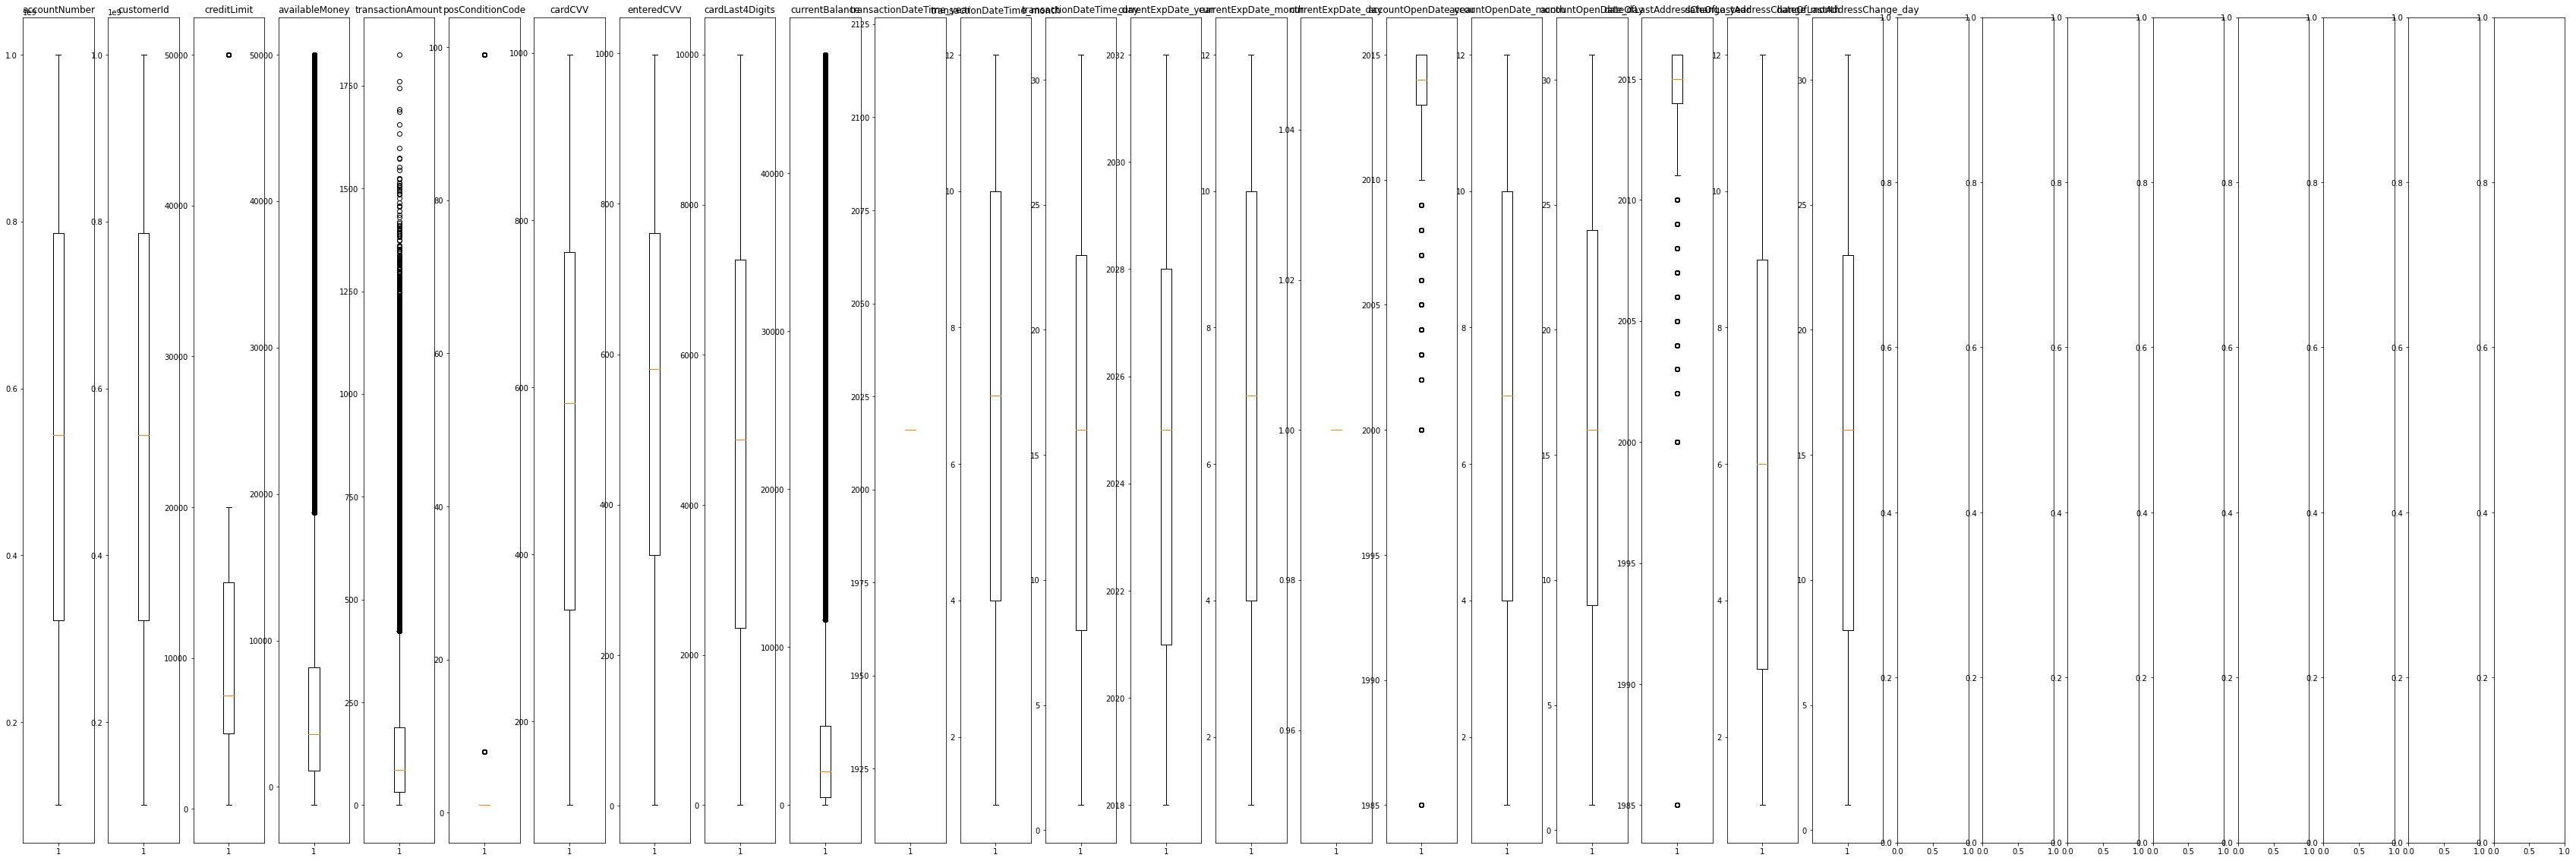

In [ ]:
import matplotlib.pyplot as plt
data_numerik=data.select_dtypes([np.number])
data_numerik
fig, ax = plt.subplots(1,30, figsize=(60, 20))

for i, col in enumerate(data_numerik):
    ax[i].boxplot(data[col])
    ax[i].set_title(col)

In [ ]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
count,6.419140e+05,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.0,641914.000000,641914.000000,641914.000000,641914.00000,641914.0,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,5.547701e+08,10697.210608,6652.828573,135.162497,3.237367,557.199927,556.775160,4886.184043,4044.382035,2016.0,6.667208,15.747265,2024.727200,6.58350,1.0,2013.475297,6.917037,15.913688,2014.570943,6.270572,15.744255
std,2.546884e+08,2.546884e+08,11460.359133,9227.132275,147.053302,9.678814,257.326204,257.402639,2859.053679,5945.510224,0.0,3.438019,8.782914,3.962184,3.45033,0.0,1.911106,3.516341,8.619203,1.924749,3.394294,8.735846
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,1.000000,100.000000,1.000000,0.000000,0.000000,2016.0,1.000000,1.000000,2018.000000,1.00000,1.0,1985.000000,1.000000,1.000000,1985.000000,1.000000,1.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1114.970000,32.320000,1.000000,334.000000,333.000000,2364.000000,502.442500,2016.0,4.000000,8.000000,2021.000000,4.00000,1.0,2013.000000,4.000000,9.000000,2014.000000,3.000000,8.000000
50%,5.438879e+08,5.438879e+08,7500.000000,3578.165000,85.800000,1.000000,581.000000,580.000000,4873.000000,2151.860000,2016.0,7.000000,16.000000,2025.000000,7.00000,1.0,2014.000000,7.000000,16.000000,2015.000000,6.000000,16.000000
75%,7.862277e+08,7.862277e+08,15000.000000,8169.185000,189.030000,1.000000,762.000000,761.000000,7267.000000,5005.890000,2016.0,10.000000,23.000000,2028.000000,10.00000,1.0,2015.000000,10.000000,24.000000,2016.000000,9.000000,23.000000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,1825.250000,99.000000,998.000000,998.000000,9998.000000,47496.500000,2016.0,12.000000,31.000000,2032.000000,12.00000,1.0,2015.000000,12.000000,31.000000,2016.000000,12.000000,31.000000


In [ ]:
#detect outlier di variabel creditLimit	availableMoney transactionAmount currentBalance

In [ ]:
# detection outlier di variabel transactionAmount (mengatasi outlier)
Q1 = np.percentile(data['transactionAmount'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(data['transactionAmount'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data['transactionAmount'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['transactionAmount'] <= (Q1-1.5*IQR))

# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)

Old Shape:  (641914, 33)
New Shape:  (608408, 33)


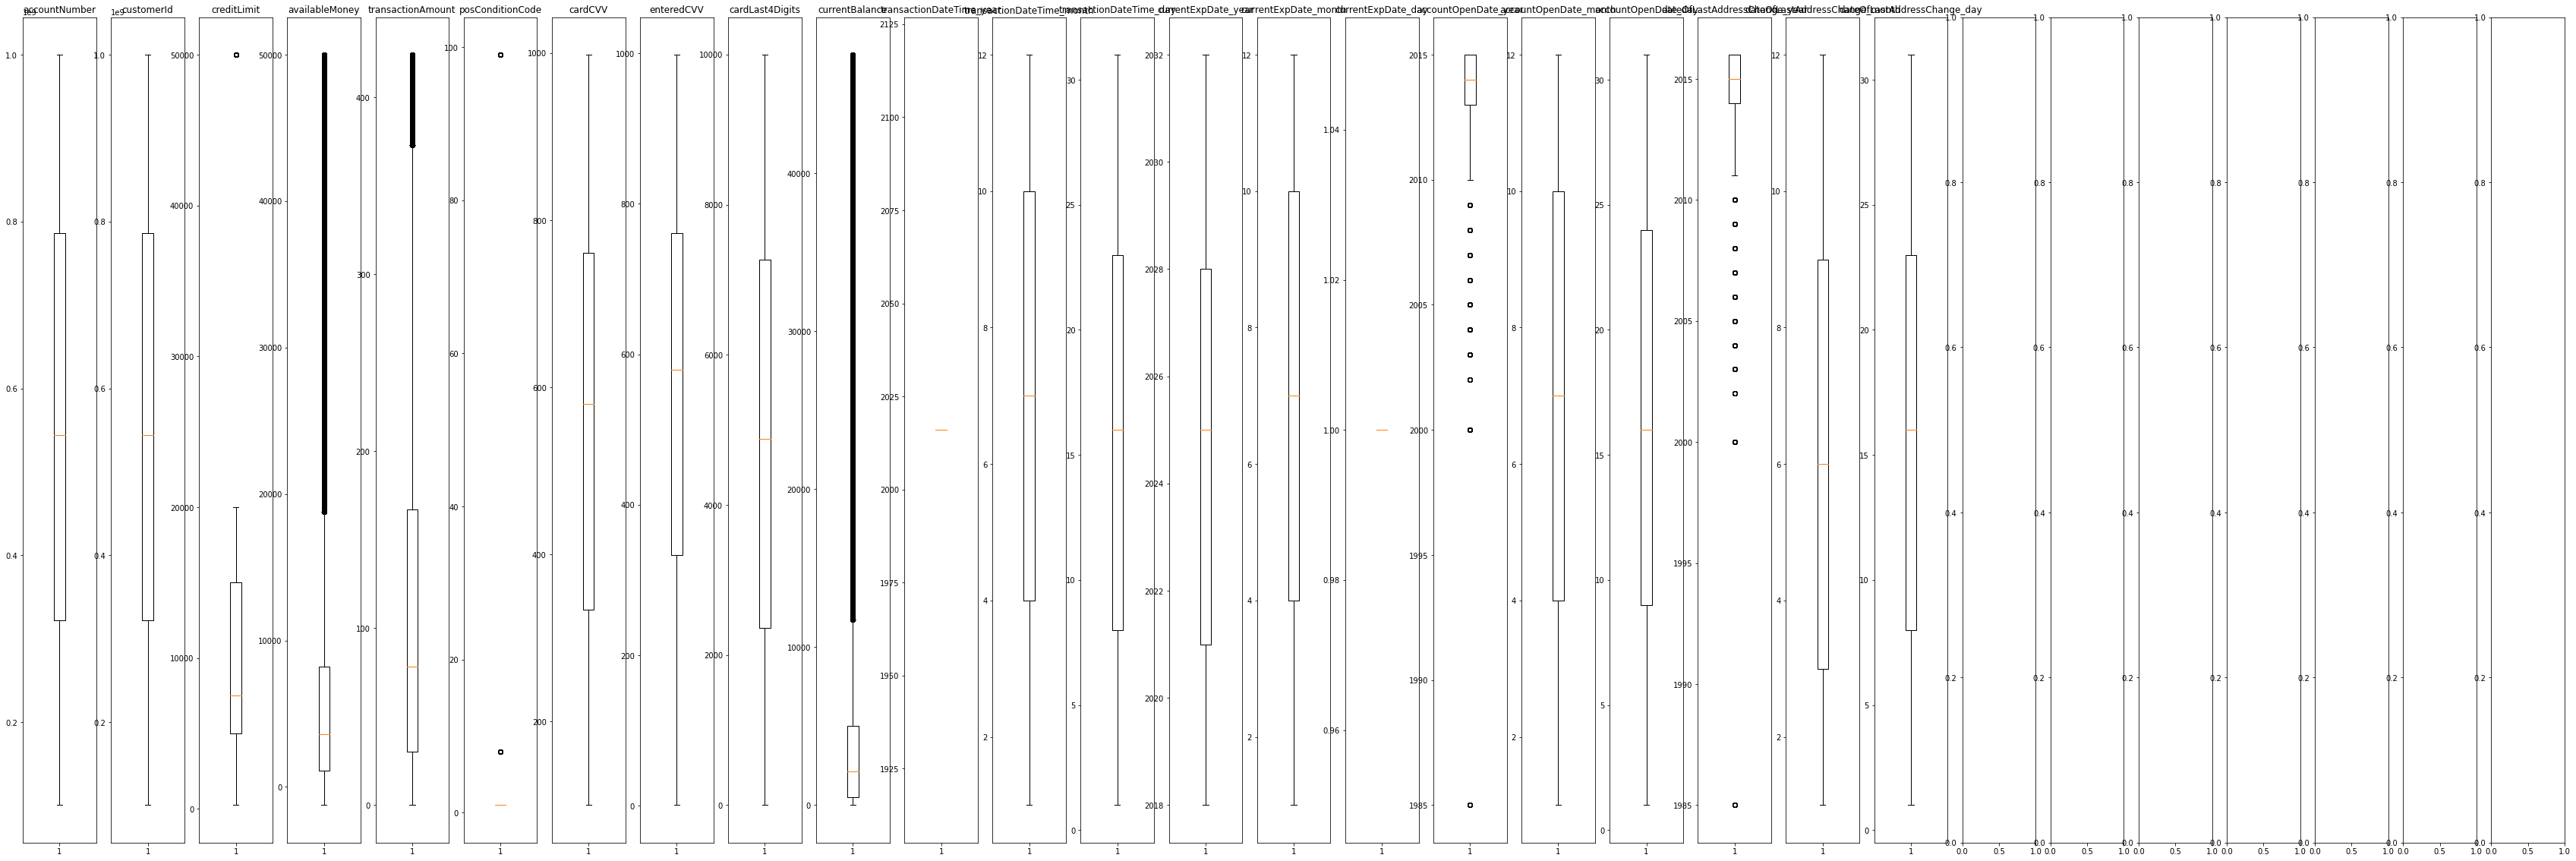

In [ ]:
data1_numerik=data.select_dtypes([np.number])
fig, ax = plt.subplots(1,29, figsize=(60, 20))

for i, col in enumerate(data1_numerik):
    ax[i].boxplot(data[col])
    ax[i].set_title(col)

In [ ]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
count,6.084080e+05,6.084080e+05,608408.000000,608408.000000,608408.000000,608408.000000,608408.000000,608408.000000,608408.000000,608408.000000,608408.0,608408.000000,608408.000000,608408.000000,608408.000000,608408.0,608408.000000,608408.000000,608408.000000,608408.000000,608408.000000,608408.000000
mean,5.547768e+08,5.547768e+08,10697.995835,6662.240267,110.925791,3.236645,557.063405,556.627400,4888.015735,4035.755568,2016.0,6.678124,15.745235,2024.727767,6.583352,1.0,2013.475594,6.916720,15.914603,2014.568771,6.273442,15.745275
std,2.547038e+08,2.547038e+08,11460.485150,9234.369913,101.641276,9.680181,257.287085,257.369492,2859.307650,5941.500613,0.0,3.437263,8.782533,3.962733,3.450334,0.0,1.910392,3.515498,8.620136,1.923863,3.393502,8.735058
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,1.000000,100.000000,1.000000,0.000000,0.000000,2016.0,1.000000,1.000000,2018.000000,1.000000,1.0,1985.000000,1.000000,1.000000,1985.000000,1.000000,1.000000
25%,3.223192e+08,3.223192e+08,5000.000000,1117.387500,30.090000,1.000000,334.000000,333.000000,2364.000000,497.422500,2016.0,4.000000,8.000000,2021.000000,4.000000,1.0,2013.000000,4.000000,9.000000,2014.000000,3.000000,8.000000
50%,5.438879e+08,5.438879e+08,7500.000000,3588.900000,78.360000,1.000000,580.000000,579.000000,4880.000000,2144.335000,2016.0,7.000000,16.000000,2025.000000,7.000000,1.0,2014.000000,7.000000,16.000000,2015.000000,6.000000,16.000000
75%,7.862277e+08,7.862277e+08,15000.000000,8190.200000,167.260000,1.000000,761.000000,761.000000,7270.000000,4992.185000,2016.0,10.000000,23.000000,2028.000000,10.000000,1.0,2015.000000,10.000000,24.000000,2016.000000,9.000000,23.000000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,424.090000,99.000000,998.000000,998.000000,9998.000000,47496.500000,2016.0,12.000000,31.000000,2032.000000,12.000000,1.0,2015.000000,12.000000,31.000000,2016.000000,12.000000,31.000000


In [ ]:
cdata=data.to_csv('/content/drive/My Drive/Colab Notebooks/Fraud/transactionsbersih1.csv', encoding='utf-8', index=False)

In [ ]:
cdata=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fraud/transactionsbersih1.csv')
cdata.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionAmount                0
merchantName                     0
merchantCountryCode              0
posConditionCode                 0
merchantCategoryCode             0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                  0
isFraud                          0
currentBalance                   0
cardPresent                      0
expirationDateKeyInMatch         0
transactionDateTime_year         0
transactionDateTime_month        0
transactionDateTime_day          0
DateTransaction                  0
currentExpDate_year              0
currentExpDate_month             0
currentExpDate_day               0
DatecurrentExp                   0
accountOpenDate_year             0
accountOpenDate_month            0
accountOpenDate_day              0
DateAccountOpen     

In [ ]:
cdata.shape

(608408, 33)

In [ ]:
cdata.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,merchantCountryCode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,DateTransaction,currentExpDate_year,currentExpDate_month,currentExpDate_day,DatecurrentExp,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,DateAccountOpen,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,DateLastAddressChange
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,0.00,False,False,2016,1,8,2016-01-08,2020,4,1,2020-04-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
1,733493772,733493772,5000,4888.67,24.75,Uber,US,1.0,rideshare,492,492,9184,PURCHASE,False,111.33,False,False,2016,1,9,2016-01-09,2023,6,1,2023-06-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,False,136.08,False,False,2016,1,11,2016-01-11,2027,12,1,2027-12-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,323.48,False,False,2016,1,11,2016-01-11,2029,9,1,2029-09-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,1.0,rideshare,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,2016,1,16,2016-01-16,2024,10,1,2024-10-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03


In [ ]:
# detection outlier di variabel currentBalance
Q1 = np.percentile(cdata['currentBalance'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(cdata['currentBalance'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
print("Old Shape: ", cdata.shape)

# Upper bound
upper = np.where(cdata['currentBalance'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(cdata['currentBalance'] <= (Q1-1.5*IQR))

# Removing the Outliers
#
cdata.drop(lower[0], inplace = True)
cdata.drop(upper[0], inplace = True)
print("New Shape: ", data.shape)

Old Shape:  (608408, 33)
New Shape:  (608408, 33)


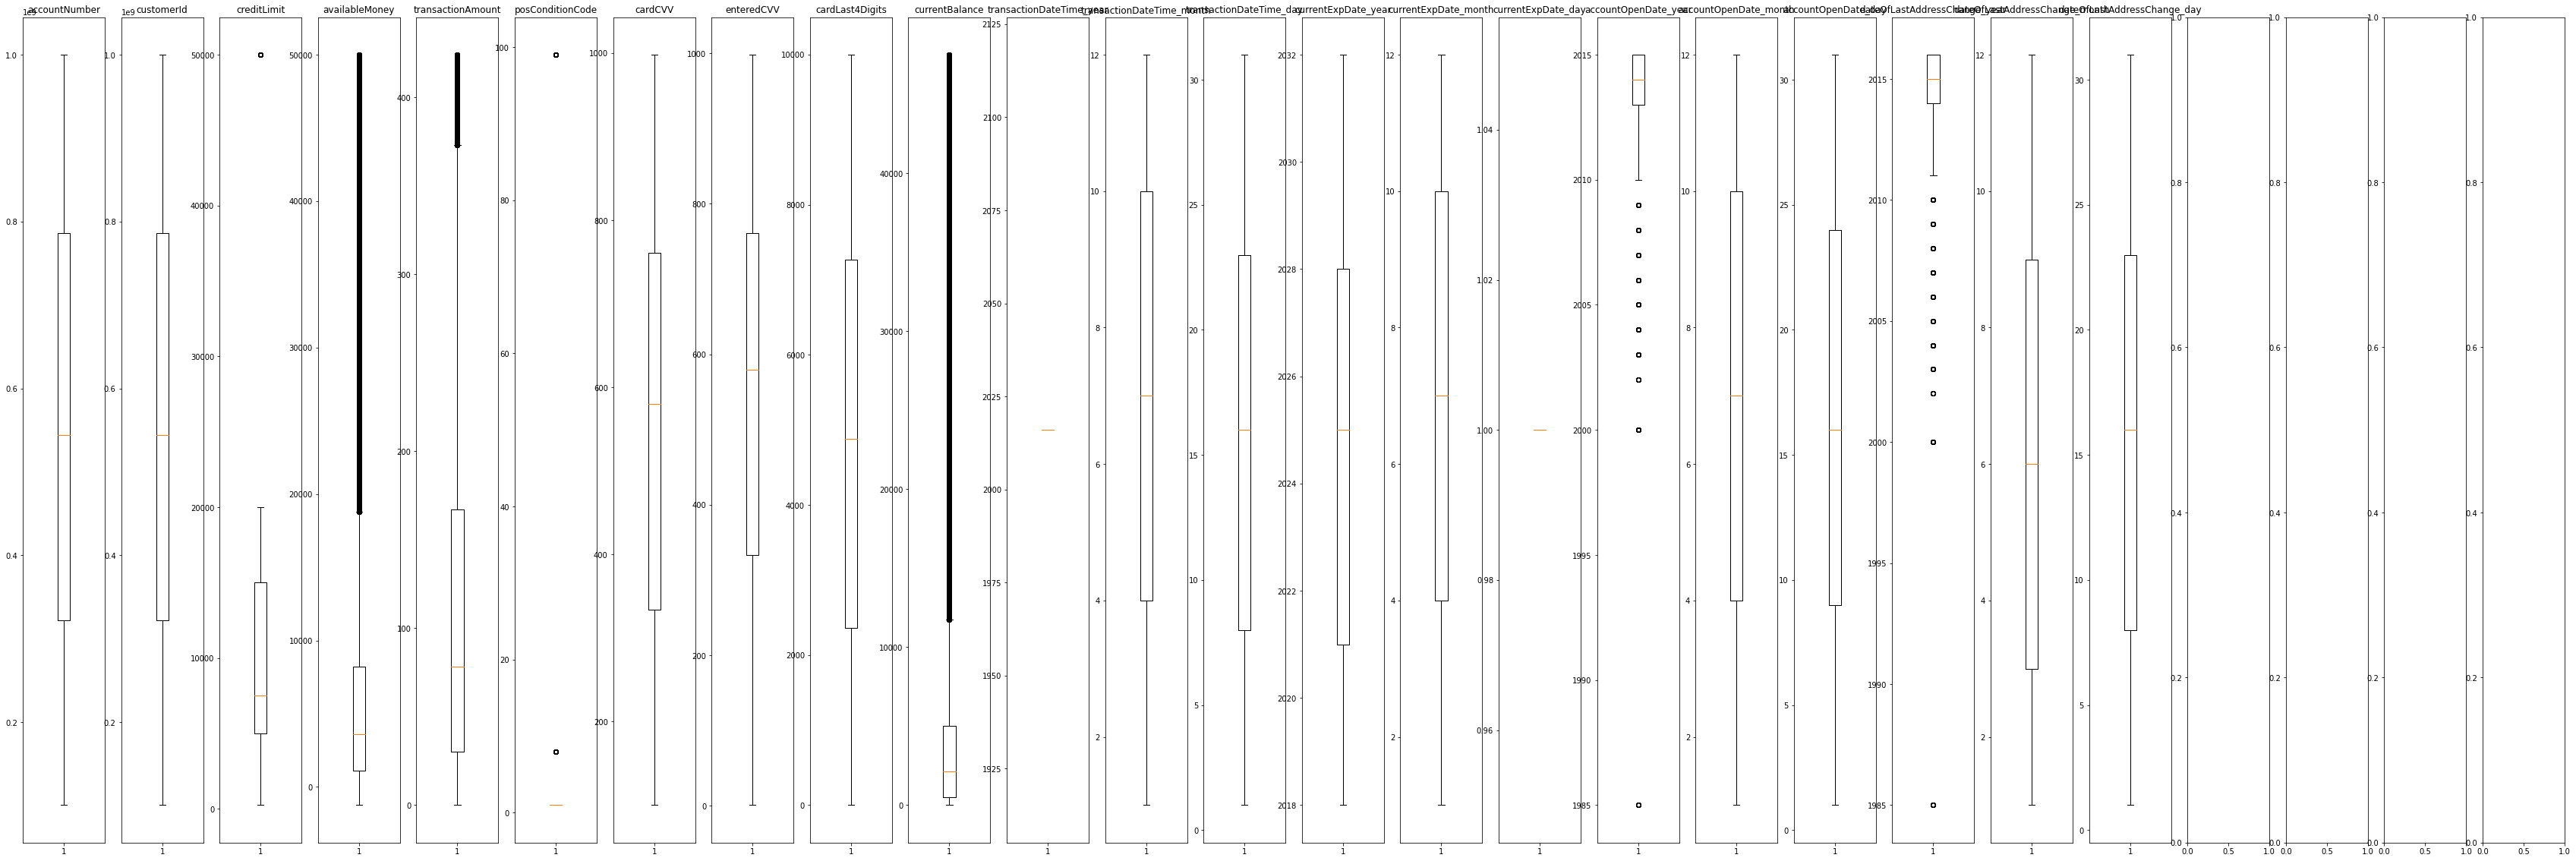

In [ ]:
import matplotlib.pyplot as plt
data_numerik=cdata.select_dtypes([np.number])
data_numerik
fig, ax = plt.subplots(1,26, figsize=(60, 20))

for i, col in enumerate(data_numerik):
    ax[i].boxplot(data[col])
    ax[i].set_title(col)

In [ ]:
cdata.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
count,5.625990e+05,5.625990e+05,562599.000000,562599.000000,562599.000000,562599.000000,562599.000000,562599.000000,562599.000000,562599.000000,562599.0,562599.000000,562599.000000,562599.000000,562599.000000,562599.0,562599.000000,562599.000000,562599.000000,562599.000000,562599.000000,562599.000000
mean,5.569898e+08,5.569898e+08,9122.138948,6392.507059,110.451536,3.236620,555.233111,554.790083,4920.411974,2729.631889,2016.0,6.629555,15.652710,2024.724493,6.584498,1.0,2013.445463,6.899440,15.958921,2014.516243,6.315665,15.740982
std,2.540919e+08,2.540919e+08,9434.114162,9061.044572,101.527711,9.670849,258.696167,258.778797,2854.225926,2755.385793,0.0,3.450837,8.790231,3.962648,3.449598,0.0,1.928636,3.484333,8.649511,1.943000,3.400834,8.697483
min,1.005471e+08,1.005471e+08,250.000000,-1244.930000,0.000000,1.000000,100.000000,1.000000,0.000000,0.000000,2016.0,1.000000,1.000000,2018.000000,1.000000,1.0,1985.000000,1.000000,1.000000,1985.000000,1.000000,1.000000
25%,3.285582e+08,3.285582e+08,5000.000000,1000.000000,29.820000,1.000000,329.000000,328.000000,2478.000000,429.770000,2016.0,4.000000,8.000000,2021.000000,4.000000,1.0,2013.000000,4.000000,9.000000,2014.000000,3.000000,8.000000
50%,5.521589e+08,5.521589e+08,7500.000000,3480.840000,77.700000,1.000000,575.000000,575.000000,4979.000000,1859.530000,2016.0,7.000000,16.000000,2025.000000,7.000000,1.0,2014.000000,7.000000,16.000000,2015.000000,6.000000,16.000000
75%,7.867212e+08,7.867212e+08,10000.000000,7860.270000,166.560000,1.000000,764.000000,764.000000,7284.000000,4255.140000,2016.0,10.000000,23.000000,2028.000000,10.000000,1.0,2015.000000,10.000000,24.000000,2016.000000,9.000000,23.000000
max,9.999853e+08,9.999853e+08,50000.000000,50000.000000,424.090000,99.000000,998.000000,998.000000,9998.000000,11734.060000,2016.0,12.000000,31.000000,2032.000000,12.000000,1.0,2015.000000,12.000000,31.000000,2016.000000,12.000000,31.000000


##no 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Fraud/transactionsbersih1.csv',sep=',')
pd.set_option('display.max_columns',None)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,merchantName,merchantCountryCode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,DateTransaction,currentExpDate_year,currentExpDate_month,currentExpDate_day,DatecurrentExp,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,DateAccountOpen,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,DateLastAddressChange
0,733493772,733493772,5000,5000.00,111.33,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,0.00,False,False,2016,1,8,2016-01-08,2020,4,1,2020-04-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
1,733493772,733493772,5000,4888.67,24.75,Uber,US,1.0,rideshare,492,492,9184,PURCHASE,False,111.33,False,False,2016,1,9,2016-01-09,2023,6,1,2023-06-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
2,733493772,733493772,5000,4863.92,187.40,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,False,136.08,False,False,2016,1,11,2016-01-11,2027,12,1,2027-12-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
3,733493772,733493772,5000,4676.52,227.34,Lyft,US,1.0,rideshare,492,492,9184,PURCHASE,True,323.48,False,False,2016,1,11,2016-01-11,2029,9,1,2029-09-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03
4,733493772,733493772,5000,4449.18,0.00,Lyft,US,1.0,rideshare,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,2016,1,16,2016-01-16,2024,10,1,2024-10-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03


In [ ]:
from sklearn.preprocessing import LabelEncoder #data encoding (yes[0]/no[1])
le = LabelEncoder()
label = le.fit_transform(df['merchantName'])
df.drop("merchantName", axis=1, inplace=True)
df["merchantName"] = label

le = LabelEncoder()
label = le.fit_transform(df['merchantCountryCode'])
df.drop("merchantCountryCode", axis=1, inplace=True)
df["merchantCountryCode"] = label

le = LabelEncoder()
label = le.fit_transform(df['merchantCategoryCode'])
df.drop("merchantCategoryCode", axis=1, inplace=True)
df["merchantCategoryCode"] = label

le = LabelEncoder()
label = le.fit_transform(df['transactionType'])
df.drop("transactionType", axis=1, inplace=True)
df["transactionType"] = label

le = LabelEncoder()
label = le.fit_transform(df['cardPresent'])
df.drop("cardPresent", axis=1, inplace=True)
df["cardPresent"] = label

le = LabelEncoder()
label = le.fit_transform(df['expirationDateKeyInMatch'])
df.drop("expirationDateKeyInMatch", axis=1, inplace=True)
df["expirationDateKeyInMatch"] = label

data balancing

In [ ]:
df.isFraud.value_counts()

False    598734
True       9674
Name: isFraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n [False: No Frauds || True: Fraud]')

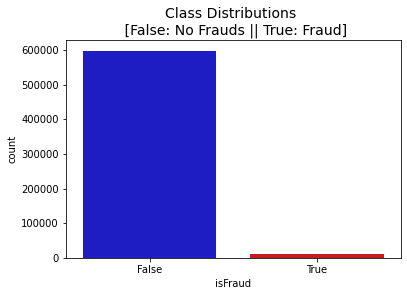

In [ ]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]
sns.countplot('isFraud', data=df, palette=colors)
plt.title('Class Distributions \n [False: No Frauds || True: Fraud]', fontsize=14)

#data imbalanced

In [ ]:
correlation = df.corr()
print(correlation["isFraud"].sort_values(ascending = False))

isFraud                          1.000000
transactionAmount                0.076662
transactionType                  0.010514
posConditionCode                 0.009264
merchantCategoryCode             0.009102
dateOfLastAddressChange_year     0.008487
currentBalance                   0.007927
dateOfLastAddressChange_day      0.005644
merchantName                     0.005457
currentExpDate_month             0.003834
creditLimit                      0.002336
accountOpenDate_month            0.001213
currentExpDate_year              0.000582
transactionDateTime_day          0.000442
accountOpenDate_year             0.000386
expirationDateKeyInMatch        -0.000947
availableMoney                  -0.002202
dateOfLastAddressChange_month   -0.004423
accountOpenDate_day             -0.004725
merchantCountryCode             -0.005257
customerId                      -0.006631
accountNumber                   -0.006631
cardLast4Digits                 -0.006953
cardCVV                         -0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


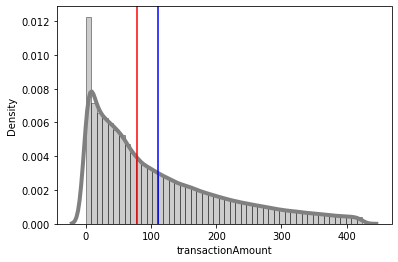

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['transactionAmount'],hist=True,kde=True,
            color='grey',
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.axvline(df['transactionAmount'].mean(),color='blue')
plt.axvline(df['transactionAmount'].median(),color='red')

In [ ]:
count_class_0, count_class_1 = df.isFraud.value_counts()
# Divide by class
df_class_0 = df[df['isFraud'] == 0]
df_class_1 = df[df['isFraud'] == 1]

Random over-sampling:
False    598734
True     598734
Name: isFraud, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


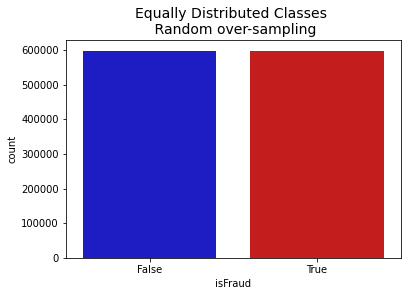

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.isFraud.value_counts())

sns.countplot('isFraud', data=df_over, palette=colors)
plt.title('Equally Distributed Classes \n Random over-sampling', fontsize=14)
plt.show()


In [ ]:
#oversampling is better, because you keep all the information in the training dataset.
#With undersampling you drop a lot of information.
#Even if this dropped information belongs to the majority class, it is usefull information for a modeling algorithm.

In [ ]:
corr = df_over.corr()
print(corr["isFraud"].sort_values(ascending = False))

isFraud                          1.000000
transactionAmount                0.281299
transactionType                  0.046309
merchantCategoryCode             0.037319
dateOfLastAddressChange_year     0.033703
currentBalance                   0.030531
posConditionCode                 0.029927
dateOfLastAddressChange_day      0.023084
merchantName                     0.022773
currentExpDate_month             0.015832
creditLimit                      0.010202
accountOpenDate_month            0.004614
currentExpDate_year              0.002688
transactionDateTime_day          0.002681
accountOpenDate_year             0.001791
expirationDateKeyInMatch        -0.003059
availableMoney                  -0.007721
dateOfLastAddressChange_month   -0.016906
accountOpenDate_day             -0.018598
merchantCountryCode             -0.019685
customerId                      -0.026284
accountNumber                   -0.026284
cardLast4Digits                 -0.028382
enteredCVV                      -0

In [ ]:
le = LabelEncoder()
label = le.fit_transform(df_over['isFraud'])
df_over.drop("isFraud", axis=1, inplace=True)
df_over["isFraud"] = label

In [ ]:
df_over.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,DateTransaction,currentExpDate_year,currentExpDate_month,currentExpDate_day,DatecurrentExp,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,DateAccountOpen,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,DateLastAddressChange,merchantName,merchantCountryCode,merchantCategoryCode,transactionType,cardPresent,expirationDateKeyInMatch,isFraud
1,733493772,733493772,5000,4888.67,24.75,1.0,492,492,9184,111.33,2016,1,9,2016-01-09,2023,6,1,2023-06-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03,2086,3,17,1,0,0,0
2,733493772,733493772,5000,4863.92,187.40,1.0,492,492,9184,136.08,2016,1,11,2016-01-11,2027,12,1,2027-12-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03,1066,3,17,1,0,0,0
4,733493772,733493772,5000,4449.18,0.00,1.0,492,492,9184,550.82,2016,1,16,2016-01-16,2024,10,1,2024-10-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03,1066,3,17,0,0,0,0
5,733493772,733493772,5000,4449.18,9.80,1.0,492,492,9184,550.82,2016,1,16,2016-01-16,2021,2,1,2021-02-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03,607,3,13,1,0,0,0
6,733493772,733493772,5000,4439.38,247.99,1.0,492,492,9184,560.62,2016,1,24,2016-01-24,2026,1,1,2026-01-01,2014,8,3,2014-08-03,2014,8,3,2014-08-03,2086,3,17,1,0,0,0


In [ ]:
df_over.dtypes

accountNumber                      int64
customerId                         int64
creditLimit                        int64
availableMoney                   float64
transactionAmount                float64
posConditionCode                 float64
cardCVV                            int64
enteredCVV                         int64
cardLast4Digits                    int64
currentBalance                   float64
transactionDateTime_year           int64
transactionDateTime_month          int64
transactionDateTime_day            int64
DateTransaction                   object
currentExpDate_year                int64
currentExpDate_month               int64
currentExpDate_day                 int64
DatecurrentExp                    object
accountOpenDate_year               int64
accountOpenDate_month              int64
accountOpenDate_day                int64
DateAccountOpen                   object
dateOfLastAddressChange_year       int64
dateOfLastAddressChange_month      int64
dateOfLastAddres

In [ ]:
df_over.drop(['accountNumber','customerId','DateTransaction','DatecurrentExp','DateAccountOpen','DateLastAddressChange'],axis=1,inplace=True)

In [ ]:
df_over.dtypes

creditLimit                        int64
availableMoney                   float64
transactionAmount                float64
posConditionCode                 float64
cardCVV                            int64
enteredCVV                         int64
cardLast4Digits                    int64
currentBalance                   float64
transactionDateTime_year           int64
transactionDateTime_month          int64
transactionDateTime_day            int64
currentExpDate_year                int64
currentExpDate_month               int64
currentExpDate_day                 int64
accountOpenDate_year               int64
accountOpenDate_month              int64
accountOpenDate_day                int64
dateOfLastAddressChange_year       int64
dateOfLastAddressChange_month      int64
dateOfLastAddressChange_day        int64
merchantName                       int64
merchantCountryCode                int64
merchantCategoryCode               int64
transactionType                    int64
cardPresent     

In [ ]:
X = df_over.drop('isFraud',axis=1)
y = df_over['isFraud']

In [ ]:
X

,creditLimit,availableMoney,transactionAmount,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day,merchantName,merchantCountryCode,merchantCategoryCode,transactionType,cardPresent,expirationDateKeyInMatch
1,5000,4888.67,24.75,1.0,492,492,9184,111.33,2016,1,9,2023,6,1,2014,8,3,2014,8,3,2086,3,17,1,0,0
2,5000,4863.92,187.40,1.0,492,492,9184,136.08,2016,1,11,2027,12,1,2014,8,3,2014,8,3,1066,3,17,1,0,0
4,5000,4449.18,0.00,1.0,492,492,9184,550.82,2016,1,16,2024,10,1,2014,8,3,2014,8,3,1066,3,17,0,0,0
5,5000,4449.18,9.80,1.0,492,492,9184,550.82,2016,1,16,2021,2,1,2014,8,3,2014,8,3,607,3,13,1,0,0
6,5000,4439.38,247.99,1.0,492,492,9184,560.62,2016,1,24,2026,1,1,2014,8,3,2014,8,3,2086,3,17,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249830,250,26.59,168.37,1.0,586,586,2777,223.41,2016,2,17,2027,2,1,2015,7,5,2015,7,5,505,3,4,1,1,0
157535,2500,1172.01,212.67,1.0,380,380,2822,1327.99,2016,12,13,2029,4,1,2014,12,7,2014,12,7,2489,3,14,1,0,0
473867,2500,838.95,64.42,1.0,437,437,1390,1661.05,2016,2,14,2022,12,1,2015,11,17,2015,11,17,2489,3,14,1,0,0
370424,15000,7266.33,0.70,1.0,447,447,1062,7733.67,2016,6,27,2032,1,1,2014,8,13,2016,5,5,2451,3,16,1,1,0


[0.03729865 0.04484546 0.1281545  0.02028507 0.04347389 0.04162148
 0.04683123 0.04525298 0.         0.05195422 0.05214022 0.05353766
 0.05534542 0.         0.03424442 0.04433133 0.04500251 0.03158829
 0.04469038 0.04617757 0.06863627 0.00290417 0.04277303 0.00787068
 0.01069521 0.00034536]


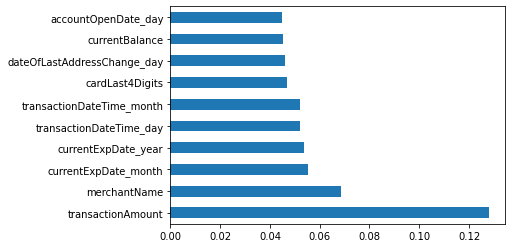

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.646129
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                    Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.068       
Dependent Variable:         isFraud                AIC:                    1547485.0610
Date:                       2022-07-08 01:56       BIC:                    1547772.9582
No. Observations:           1197468                Log-Likelihood:         -7.7372e+05 
Df Model:                   23                     LL-Null:                -8.3002e+05 
Df Residuals:               1197444                LLR p-value:            0.0000      
Converged:                  0.0000                 Scale:                  1.0000      
No. Iterations:             35.0000                                                    
---------------------------------------------------------------------------------------
                               Coef.   Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------------

Logistic Regression Model

In [ ]:
train=df_over[['currentBalance','cardPresent','transactionAmount','isFraud','merchantName']]
train

,currentBalance,cardPresent,transactionAmount,isFraud,merchantName
1,111.33,0,24.75,0,2086
2,136.08,0,187.40,0,1066
4,550.82,0,0.00,0,1066
5,550.82,0,9.80,0,607
6,560.62,0,247.99,0,2086
...,...,...,...,...,...
467000,9254.06,0,195.34,1,496
447471,166.90,0,353.10,1,2479
226337,3961.41,1,120.83,1,17
307506,1697.72,0,177.79,1,2475


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('isFraud',axis=1),
                                                    train['isFraud'], test_size=0.30,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
print('Coefficients: \n', logmodel.coef_)

In [ ]:
print('Intercept: \n', logmodel.intercept_)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

# no 2
#Metode 2

In [ ]:
cdata.isFraud.value_counts()

False    553693
True       8906
Name: isFraud, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n [False: No Frauds || True: Fraud]')

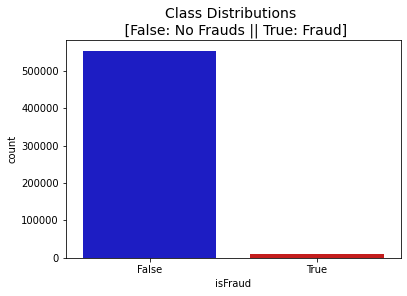

In [ ]:
import seaborn as sns
colors = ["#0101DF", "#DF0101"]
sns.countplot('isFraud', data=cdata, palette=colors)
plt.title('Class Distributions \n [False: No Frauds || True: Fraud]', fontsize=14)

#data imbalanced

In [ ]:
correlation = cdata.corr()
print(correlation["isFraud"].sort_values(ascending = False))

isFraud                          1.000000
transactionAmount                0.075860
currentBalance                   0.012866
posConditionCode                 0.009188
dateOfLastAddressChange_year     0.008416
dateOfLastAddressChange_day      0.005501
currentExpDate_month             0.004134
creditLimit                      0.000819
currentExpDate_year              0.000728
transactionDateTime_day         -0.000152
accountOpenDate_year            -0.000165
accountOpenDate_month           -0.000778
expirationDateKeyInMatch        -0.001387
availableMoney                  -0.003059
accountOpenDate_day             -0.004366
dateOfLastAddressChange_month   -0.004482
accountNumber                   -0.005510
customerId                      -0.005510
cardLast4Digits                 -0.006101
cardCVV                         -0.007802
enteredCVV                      -0.007824
transactionDateTime_month       -0.009251
cardPresent                     -0.011506
transactionDateTime_year          

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


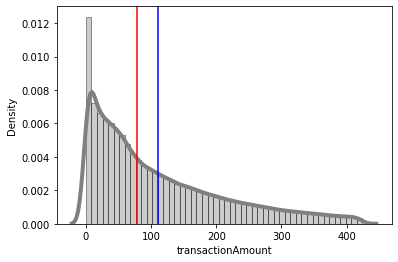

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(cdata['transactionAmount'],hist=True,kde=True,
            color='grey',
            hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})
plt.axvline(cdata['transactionAmount'].mean(),color='blue')
plt.axvline(cdata['transactionAmount'].median(),color='red')

#Handling imbalanced

In [ ]:
count_class_0, count_class_1 = cdata.isFraud.value_counts()
# Divide by class
df_class_0 = cdata[cdata['isFraud'] == 0]
df_class_1 = cdata[cdata['isFraud'] == 1]

Random over-sampling:
False    553693
True     553693
Name: isFraud, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


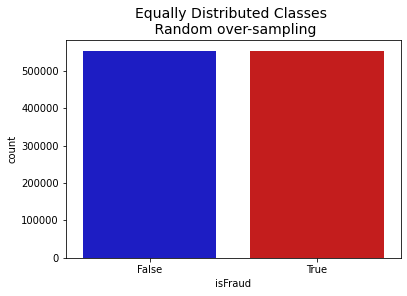

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.isFraud.value_counts())

sns.countplot('isFraud', data=df_over, palette=colors)
plt.title('Equally Distributed Classes \n Random over-sampling', fontsize=14)
plt.show()


In [ ]:
#oversampling is better, because you keep all the information in the training dataset.
#With undersampling you drop a lot of information.
#Even if this dropped information belongs to the majority class, it is usefull information for a modeling algorithm.

In [ ]:
corr = df_over.corr()
corr

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionDateTime_year,transactionDateTime_month,transactionDateTime_day,currentExpDate_year,currentExpDate_month,currentExpDate_day,accountOpenDate_year,accountOpenDate_month,accountOpenDate_day,dateOfLastAddressChange_year,dateOfLastAddressChange_month,dateOfLastAddressChange_day
accountNumber,1.000000,1.000000,-0.040013,-0.028867,-0.004792,-0.004280,-0.001771,-0.001326,0.018275,-0.021159,-0.040316,-0.035383,0.010036,NaN,-0.001089,0.002318,-0.003773,-0.002797,NaN,-0.013933,-0.053642,0.064667,-0.031150,0.004863,0.008248
customerId,1.000000,1.000000,-0.040013,-0.028867,-0.004792,-0.004280,-0.001771,-0.001326,0.018275,-0.021159,-0.040316,-0.035383,0.010036,NaN,-0.001089,0.002318,-0.003773,-0.002797,NaN,-0.013933,-0.053642,0.064667,-0.031150,0.004863,0.008248
creditLimit,-0.040013,-0.040013,1.000000,0.952158,-0.003255,0.003364,-0.007108,-0.006450,-0.017573,0.003249,0.283686,-0.014070,-0.001716,NaN,-0.021265,-0.032124,0.005638,0.000335,NaN,0.034988,0.011173,-0.037321,-0.041624,0.008153,0.003608
availableMoney,-0.028867,-0.028867,0.952158,1.000000,-0.010601,0.002745,0.006502,0.007277,-0.012734,-0.012964,-0.022937,-0.026966,-0.002923,NaN,-0.046409,-0.069979,0.005649,0.001163,NaN,0.030629,0.020738,-0.025298,-0.089948,0.025437,-0.000835
transactionAmount,-0.004792,-0.004792,-0.003255,-0.010601,1.000000,0.008834,0.003039,0.002480,0.000603,0.278388,0.022614,-0.013337,0.002173,NaN,-0.030559,-0.003304,0.002226,0.008485,NaN,0.004870,-0.001223,0.016372,0.023106,-0.002665,0.006216
posConditionCode,-0.004280,-0.004280,0.003364,0.002745,0.008834,1.000000,-0.004168,-0.003656,0.003556,0.029879,0.002394,-0.010631,-0.000716,NaN,-0.002369,-0.003821,-0.009788,0.003841,NaN,-0.009703,-0.007056,0.005105,-0.012547,-0.001023,0.000031
cardCVV,-0.001771,-0.001771,-0.007108,0.006502,0.003039,-0.004168,1.000000,0.993779,-0.034191,-0.030125,-0.043652,0.001991,0.000853,NaN,-0.002422,0.002597,-0.007531,-0.001544,NaN,-0.024311,0.027141,-0.084938,-0.001865,0.000966,-0.040795
enteredCVV,-0.001326,-0.001326,-0.006450,0.007277,0.002480,-0.003656,0.993779,1.000000,-0.034411,-0.030076,-0.043935,0.001980,0.000605,NaN,-0.002080,0.003200,-0.007293,-0.002611,NaN,-0.024645,0.027021,-0.083591,-0.002278,0.000698,-0.040485
cardLast4Digits,0.018275,0.018275,-0.017573,-0.012734,0.000603,0.003556,-0.034191,-0.034411,1.000000,-0.024128,-0.017532,-0.042378,-0.000648,NaN,0.009930,0.004193,0.000389,-0.000110,NaN,-0.059395,0.000043,0.073759,-0.045732,0.029605,0.023898
isFraud,-0.021159,-0.021159,0.003249,-0.012964,0.278388,0.029879,-0.030125,-0.030076,-0.024128,1.000000,0.051308,-0.046606,-0.006130,NaN,-0.036193,-0.001112,0.002859,0.015334,NaN,-0.000107,-0.004800,-0.017497,0.034712,-0.019712,0.021308


In [ ]:
print(corr["isFraud"].sort_values(ascending = False))

isFraud                          1.000000
transactionAmount                0.278388
currentBalance                   0.051308
dateOfLastAddressChange_year     0.034712
posConditionCode                 0.029879
dateOfLastAddressChange_day      0.021308
currentExpDate_month             0.015334
creditLimit                      0.003249
currentExpDate_year              0.002859
accountOpenDate_year            -0.000107
transactionDateTime_day         -0.001112
accountOpenDate_month           -0.004800
expirationDateKeyInMatch        -0.006130
availableMoney                  -0.012964
accountOpenDate_day             -0.017497
dateOfLastAddressChange_month   -0.019712
accountNumber                   -0.021159
customerId                      -0.021159
cardLast4Digits                 -0.024128
enteredCVV                      -0.030076
cardCVV                         -0.030125
transactionDateTime_month       -0.036193
cardPresent                     -0.046606
transactionDateTime_year          

In [ ]:
df_over.shape

(1107386, 33)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_over['merchantName'])
df_over.drop("merchantName", axis=1, inplace=True)
df_over["merchantName"] = label

le = LabelEncoder()
label = le.fit_transform(df_over['merchantCountryCode'])
df_over.drop("merchantCountryCode", axis=1, inplace=True)
df_over["merchantCountryCode"] = label

le = LabelEncoder()
label = le.fit_transform(df_over['merchantCategoryCode'])
df_over.drop("merchantCategoryCode", axis=1, inplace=True)
df_over["merchantCategoryCode"] = label

le = LabelEncoder()
label = le.fit_transform(df_over['transactionType'])
df_over.drop("transactionType", axis=1, inplace=True)
df_over["transactionType"] = label

le = LabelEncoder()
label = le.fit_transform(df_over['cardPresent'])
df_over.drop("cardPresent", axis=1, inplace=True)
df_over["cardPresent"] = label

In [ ]:
df_over.drop(['accountNumber','customerId','DateTransaction','DatecurrentExp','DateAccountOpen','DateLastAddressChange'],axis=1,inplace=True)

In [ ]:
df_over.dtypes

creditLimit                        int64
availableMoney                   float64
transactionAmount                float64
posConditionCode                 float64
cardCVV                            int64
enteredCVV                         int64
cardLast4Digits                    int64
isFraud                             bool
currentBalance                   float64
expirationDateKeyInMatch            bool
transactionDateTime_year           int64
transactionDateTime_month          int64
transactionDateTime_day            int64
currentExpDate_year                int64
currentExpDate_month               int64
currentExpDate_day                 int64
accountOpenDate_year               int64
accountOpenDate_month              int64
accountOpenDate_day                int64
dateOfLastAddressChange_year       int64
dateOfLastAddressChange_month      int64
dateOfLastAddressChange_day        int64
merchantName                       int64
merchantCountryCode                int64
merchantCategory

In [ ]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
X = df_over.drop('isFraud',axis=1)
y = df_over['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((775170, 26), (332216, 26))

Feature Importance with Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


Feature: 0, Score: 0.00855
Feature: 1, Score: 0.00828
Feature: 2, Score: 0.56527
Feature: 3, Score: 0.00505
Feature: 4, Score: 0.02768
Feature: 5, Score: 0.03301
Feature: 6, Score: 0.02446
Feature: 7, Score: 0.02179
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00541
Feature: 11, Score: 0.00125
Feature: 12, Score: 0.00006
Feature: 13, Score: 0.00077
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00604
Feature: 16, Score: 0.01157
Feature: 17, Score: 0.03177
Feature: 18, Score: 0.02002
Feature: 19, Score: 0.00258
Feature: 20, Score: 0.01038
Feature: 21, Score: 0.08711
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.08597
Feature: 24, Score: 0.01357
Feature: 25, Score: 0.02940


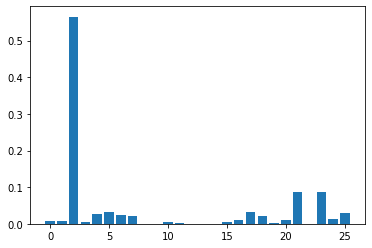

In [ ]:
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=10, oob_score=True)
classifier_rf.fit(X_train, y_train)

importance = classifier_rf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Importance": importance
})
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
2,transactionAmount,0.565273
21,merchantName,0.087114
23,merchantCategoryCode,0.085967
5,enteredCVV,0.033011
17,accountOpenDate_day,0.031773
25,cardPresent,0.029398
4,cardCVV,0.027677
6,cardLast4Digits,0.024460
7,currentBalance,0.021788
18,dateOfLastAddressChange_year,0.020022


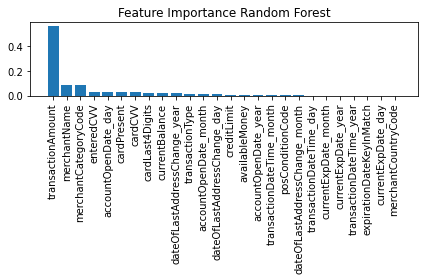

In [ ]:
import matplotlib.pyplot as plt
sorted_indices = np.argsort(importance)[::-1]
plt.title('Feature Importance Random Forest')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Akurasi model dengan top 11 variabel importance
from sklearn.metrics import confusion_matrix
y_pred = classifier_rf.predict(X_test)
cmRF = confusion_matrix(y_test, y_pred)
cmRF

array([[ 92343,  73595],
       [ 40948, 125330]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.69      0.56      0.62    165938
        True       0.63      0.75      0.69    166278

    accuracy                           0.66    332216
   macro avg       0.66      0.66      0.65    332216
weighted avg       0.66      0.66      0.65    332216



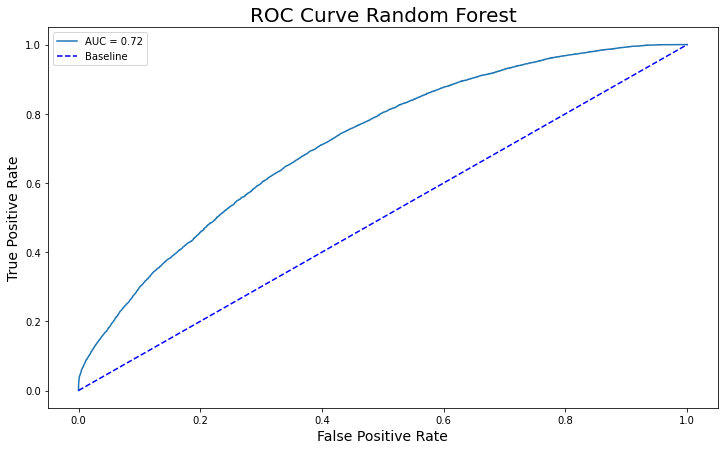

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=classifier_rf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, threshold = roc_curve(y_test, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve Random Forest', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

Feature Importance Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Feature: 0, Score: 0.00001
Feature: 1, Score: -0.00001
Feature: 2, Score: 0.00540
Feature: 3, Score: 0.00740
Feature: 4, Score: 0.00117
Feature: 5, Score: -0.00143
Feature: 6, Score: -0.00002
Feature: 7, Score: 0.00002
Feature: 8, Score: -0.00002
Feature: 9, Score: -0.00068
Feature: 10, Score: -0.00625
Feature: 11, Score: -0.00205
Feature: 12, Score: -0.00021
Feature: 13, Score: 0.00255
Feature: 14, Score: -0.00000
Feature: 15, Score: -0.00109
Feature: 16, Score: -0.00024
Feature: 17, Score: -0.00908
Feature: 18, Score: 0.00168
Feature: 19, Score: -0.00274
Feature: 20, Score: 0.00829
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00023
Feature: 23, Score: 0.00683
Feature: 24, Score: 0.00020
Feature: 25, Score: -0.00123


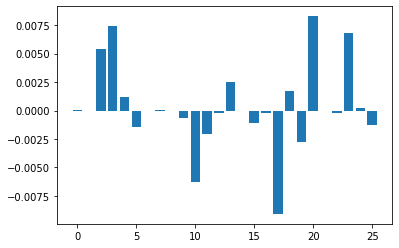

In [ ]:
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

LR= LogisticRegression()
LR.fit(X_train, y_train)
importance = LR.coef_[0]

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Importance": importance
})
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
20,dateOfLastAddressChange_day,8.286212e-03
3,posConditionCode,7.400016e-03
23,merchantCategoryCode,6.831080e-03
2,transactionAmount,5.400868e-03
13,currentExpDate_month,2.553472e-03
18,dateOfLastAddressChange_year,1.682938e-03
4,cardCVV,1.174192e-03
24,transactionType,1.951252e-04
7,currentBalance,2.319136e-05
0,creditLimit,1.033494e-05


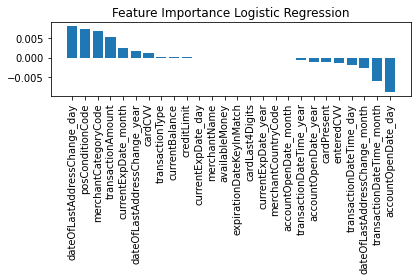

In [ ]:
import matplotlib.pyplot as plt
sorted_indices = np.argsort(importance)[::-1]
plt.title('Feature Importance Logistic Regression')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Akurasi model
from sklearn.metrics import confusion_matrix
y_test.astype('int')
y_pred = LR.predict(X_test)
cmLR = confusion_matrix(y_test, y_pred)
cmLR

array([[113829,  52109],
       [ 72268,  94010]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.61      0.69      0.65    165938
        True       0.64      0.57      0.60    166278

    accuracy                           0.63    332216
   macro avg       0.63      0.63      0.62    332216
weighted avg       0.63      0.63      0.62    332216



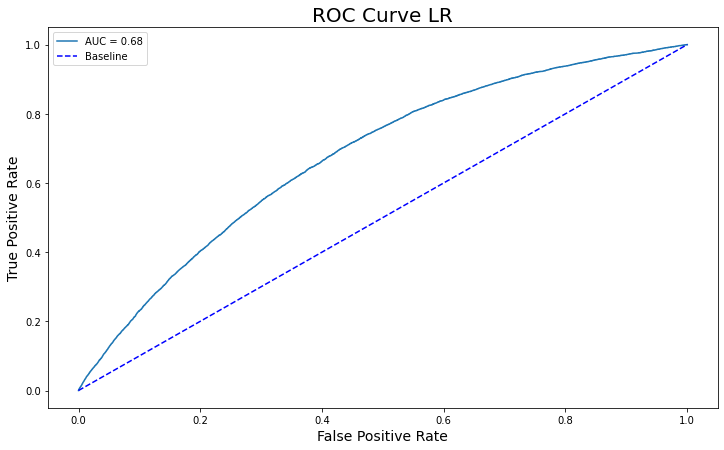

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=LR.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, threshold = roc_curve(y_test, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve LR', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

XGBoost Classifier

Feature: 0, Score: 0.04303
Feature: 1, Score: 0.01870
Feature: 2, Score: 0.26996
Feature: 3, Score: 0.03283
Feature: 4, Score: 0.04445
Feature: 5, Score: 0.05714
Feature: 6, Score: 0.03316
Feature: 7, Score: 0.05708
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.02185
Feature: 11, Score: 0.00925
Feature: 12, Score: 0.01000
Feature: 13, Score: 0.00811
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.02911
Feature: 16, Score: 0.02433
Feature: 17, Score: 0.03728
Feature: 18, Score: 0.01621
Feature: 19, Score: 0.02912
Feature: 20, Score: 0.04908
Feature: 21, Score: 0.06763
Feature: 22, Score: 0.01303
Feature: 23, Score: 0.07425
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.05441


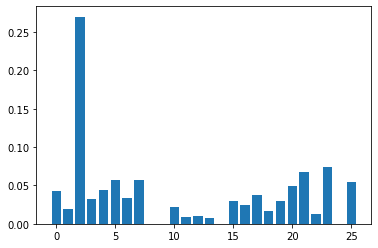

In [ ]:
import xgboost
from xgboost import XGBClassifier
from matplotlib import pyplot

XGB= XGBClassifier()
XGB.fit(X_train, y_train)
importance = XGB.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Importance": importance
})
imp_df.sort_values(by="Importance", ascending=False)

,Varname,Importance
2,transactionAmount,0.269961
23,merchantCategoryCode,0.074248
21,merchantName,0.067627
5,enteredCVV,0.057137
7,currentBalance,0.057079
25,cardPresent,0.054413
20,dateOfLastAddressChange_day,0.049076
4,cardCVV,0.044448
0,creditLimit,0.043026
17,accountOpenDate_day,0.037281


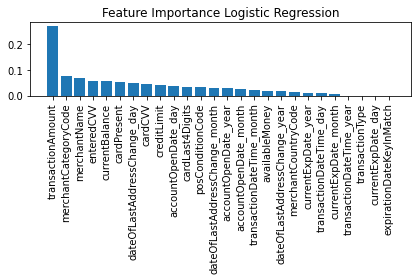

In [ ]:
import matplotlib.pyplot as plt
sorted_indices = np.argsort(importance)[::-1]
plt.title('Feature Importance Logistic Regression')
plt.bar(range(X_train.shape[1]), importance[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Akurasi model
from sklearn.metrics import confusion_matrix
y_pred = XGB.predict(X_test)
cmLR = confusion_matrix(y_test, y_pred)
cmLR

array([[102702,  63236],
       [ 43599, 122679]])

In [ ]:
#Cek Akurasi dan sensitifitas (recall)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.70      0.62      0.66    165938
        True       0.66      0.74      0.70    166278

    accuracy                           0.68    332216
   macro avg       0.68      0.68      0.68    332216
weighted avg       0.68      0.68      0.68    332216



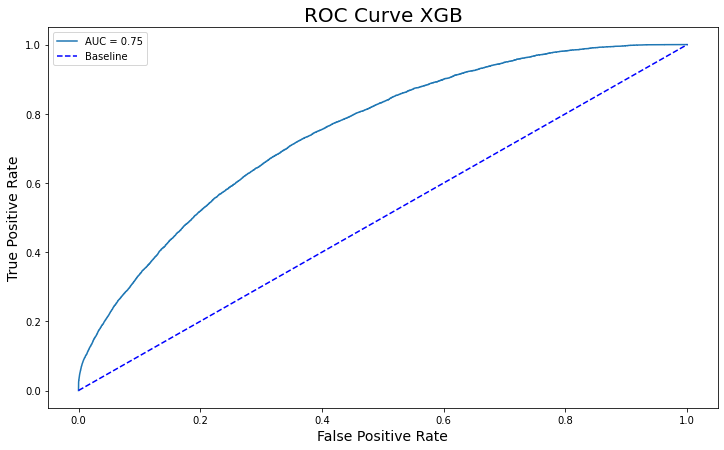

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
probs=XGB.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, threshold = roc_curve(y_test, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve XGB', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();